# An image processing example 

> One step at a time 

In the previous section we found and downloaded 28 tif files that we need to inspect and subsequently process. In this example for every imaged page of the falnama manuscript we need to stitch the upper and lower halves of the pages.   


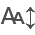

In [ ]:
from fairdatanow import RemoteData
import os 

In [ ]:
configuration = {
    'url': "https://laboppad.nl/falnama-project", 
    'user':    os.getenv('NC_AUTH_USER'),
    'password': os.getenv('NC_AUTH_PASS')
}

In [ ]:
remote_data = RemoteData(configuration)
remote_data.listdir(search_regex='edited.tif')

Please wait while scanning all file paths in remote folder...
Ready building file table for 'falnama-project'
Total number of files and directories: 6342
Total size of the files: 194.8 GiB


ITable(classes='display nowrap')

Let's take a look at the filenames. 

In [ ]:
files = remote_data.download_selected()

basenames = [os.path.basename(f) for f in files]
basenames

Ready with downloading 28 selected remote files to local cache: /home/frank/.cache/fairdatanow                                                                      


['71803-10_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-10_top_Falnama_grenz_1-2_edited.tif',
 '71803-11_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-11_top_Falnama_grenz_1-2_edited.tif',
 '71803-17_bottom_Falnama_genz_2-2_edited.tif',
 '71803-17_top_Falnama_grenz_1-2_edited.tif',
 '71803-19_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-19_top_Falnama_grenz_1-2_edited.tif',
 '71803-1_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-1_top_Falnama_grenz_1-2_edited.tif',
 '71803-20_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-20_top_Falnama_grenz_1-2_edited.tif',
 '71803-21_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-21_top_Falnama_grenz_1-2_edited.tif',
 '71803-22_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-22_top_Falnama_grenz_1-2_edited.tif',
 '71803-2_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-2_top_Falnama_grenz_1-2_edited.tif',
 '71803-3_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-3_top_Falnama_grenz_1-2_edited.tif',
 '71803-4_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-4

Ok, let's extract the object number and top/bottom part of each filename. 

In [ ]:
object_nums = [re.sub('_Falnama.*', '', b) for b in basenames]

Ok, we need to fix a few problems here before we can stitch. First, we need an efficient thumbnail generation for plotting an overview. Second, we need to rename these files so we get a proper order.  

## Thumbnail overview using imageio and skimage 

Mm, Let's see how we can create thumbnails quick and easy. This would be my first attempt to create thumbnails for these rather large tif files. However this takes 6 minutes on my machine... 

In [ ]:
#| code-fold: true
import imageio.v3 as iio
import matplotlib.pyplot as plt
import re 
import skimage as sk
import numpy as np

In [ ]:
#| code-fold: true
thumbnails = []
for i, f in enumerate(files): 
    print(f'{i}/{len(files)}', end='\r')
    im = iio.imread(f)
    thumb = sk.transform.rescale(im, 0.1)
    thumbnails.append(thumb)    

27/28

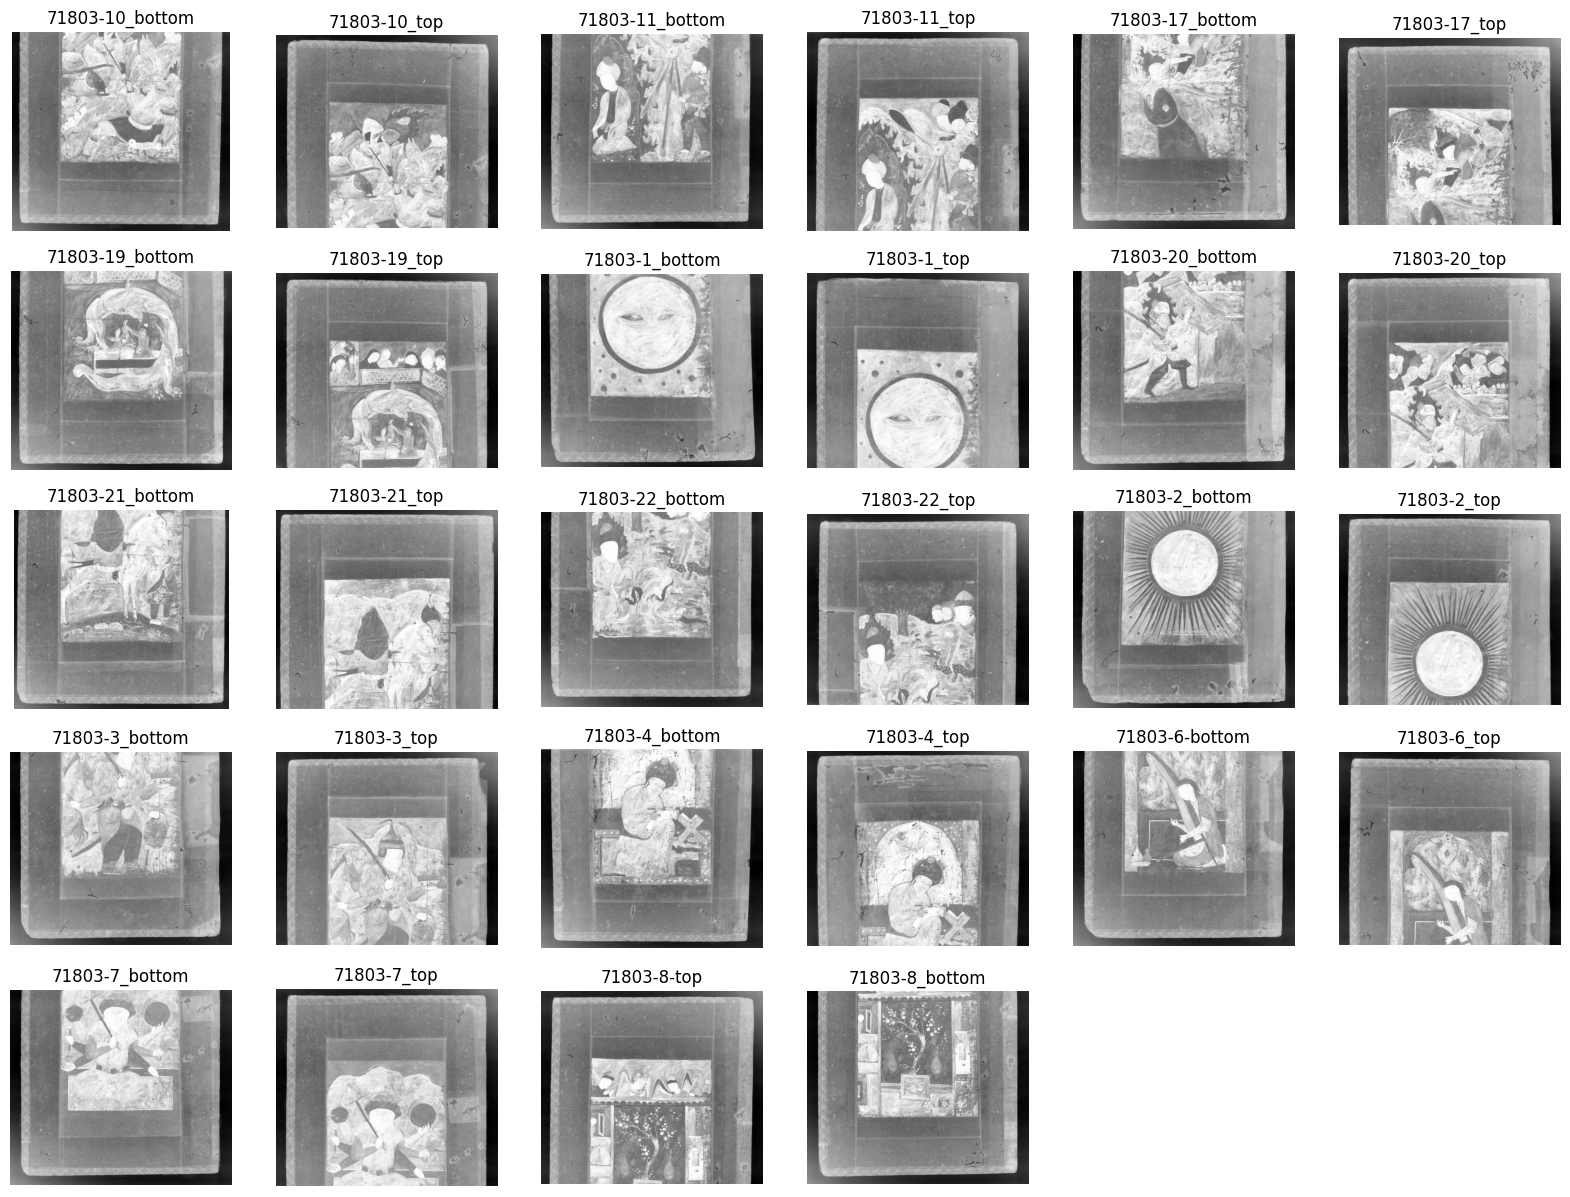

In [ ]:
#| code-fold: true
ncols = 6 
nrows = int(np.ceil(len(thumbnails) / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[20, 15])
axs = axs.flatten()

for ax in axs: 
    ax.axis('off')

for ax, thumb, num in zip(axs, thumbnails, object_nums): 
    ax.set_title(num)
    ax.imshow(thumb, cmap='gray')